# Project Foundations for Data Science: FoodHub Data Analysis




### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order (1).csv


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.



## **How many rows and columns are present in the data?**

In [ ]:
# to show rows and columns that are present in the dataframe(df)
rows, columns = df.shape
print(f'The dataframe has {rows} rows and {columns} columns.')

The dataframe has 1898 rows and 9 columns.


#### Observations: The foodhub dataframe has 9 columns head name and 1898 rows


## **What are the datatypes of the different columns in the dataset? (The info() function can be used)**

In [ ]:
# to show the datatypes i will use df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: i can observe that order_id, customer_id, food_preparation_time and delivery_time are integers ; restaurant_name, cuisine_type, day_of_the_week and rating are objects and lastly cost_of_the_order is a float


## **Are there any missing values in the data? If yes, treat them using an appropriate method**

In [ ]:
# To check for missing values in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: I can observe that there are no missing values in the dataframe.


### **Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?**

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: I observed the statiscal summary of the data;
- The minimum time it takes for food to be prepared once an order is made is 20 minutes.
- The average time it takes for food to be prepared once an order is made is 27 minutes.
- The maximum time it takes for food to be prepared once an order is made is 35 minutes.


### **How many orders are not rated?**

In [ ]:
# to show dataframe shape
df.shape
# to show orders that are not rated in the dataframe
not_rated_orders = df[df['rating'] == 'Not given'].shape[0]
print(f" Number of orders not rated: {not_rated_orders}")

 Number of orders not rated: 736


#### Observations: I observed that the orders that are not rated from the column 'rating' is 736


### **Exploratory Data Analysis (EDA)**

### Univariate Analysis

### **Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)**

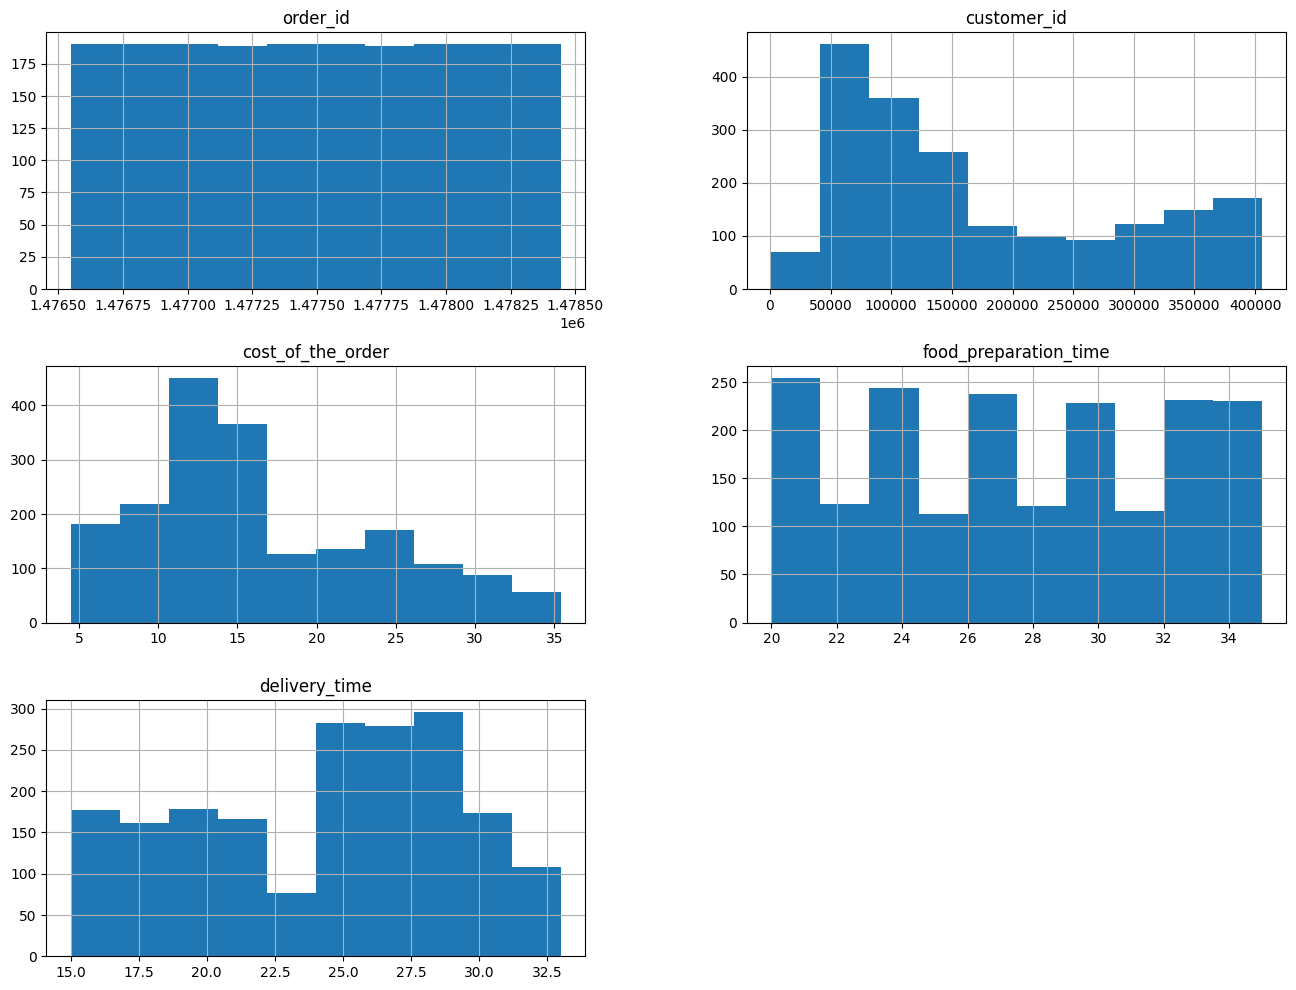

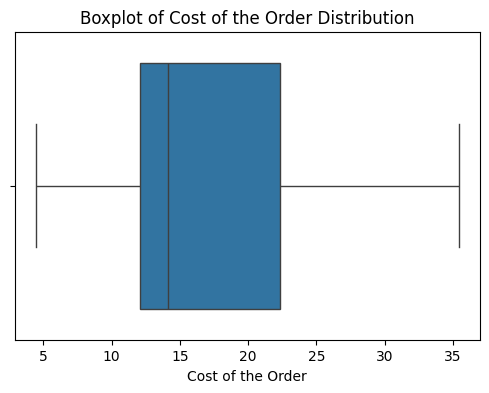

In [ ]:
# to show histogram for EDA
df.hist(figsize=(16, 12))
plt.show()

 # to show box plot for EDA
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Boxplot of Cost of the Order Distribution')
plt.xlabel('Cost of the Order')
plt.show()



### **Which are the top 5 restaurants in terms of the number of orders received?**

In [ ]:
#to show top 5 restaurants
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: i can observe that the top 5 restaurants in terms of number of orders received are ;
- Shake Shack - 219
- The meatball shop - 132
- Blue ribbon sushi - 119
- Blue Ribbon Fried chicken - 96
- Parm - 68



### **Which is the most popular cuisine on weekends?**

In [ ]:
# to show most popular cuisine
weekend_cuisine = df[df['day_of_the_week'] == 'Weekend']

# this is to find the most popular cuisine on weekends
most_popular_cuisine = weekend_cuisine['cuisine_type'].value_counts().idxmax()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")

The most popular cuisine on weekends is: American


#### Observations: I observed that the most popular cuisine on the weekends is American


### **What percentage of the orders cost more than 20 dollars?**

In [ ]:
# to count orders with cost greater than 20 dollars
orders_above_20_dollars = df[df['cost_of_the_order'] > 20].shape[0]

# total number of orders
total_orders = df.shape[0]

# to calculate percentage above 20 dollars
percentage_above_20 = (orders_above_20_dollars / total_orders) * 100

print(f"Percentage of orders costing more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### Observations: I can observe that the percentage of orders that cost above 20 dollars is 29.24%



### **What is the mean order delivery time?**

In [ ]:
# this is to show the mean delivery time using 'delivery_time' from the column name
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations: I can observe that the mean order delivery time is 24.16 minutes.


### **The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed**

In [ ]:
# to find the top 3 most frequent customers
top_3_customers = df['customer_id'].value_counts().head(3)
print(f"The Top most 3 frequent customers and the number of orders they placed:")
print (top_3_customers)

The Top most 3 frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: I can observe that the top 3 most frequent customers and the order they placed identifying them using their customer_id are ;
- customer_id 52832 with 13 orders
- customer_id 47440 with 10 orders
- customer_id 83287 with 9 orders


### Multivariate Analysis

### **Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)**

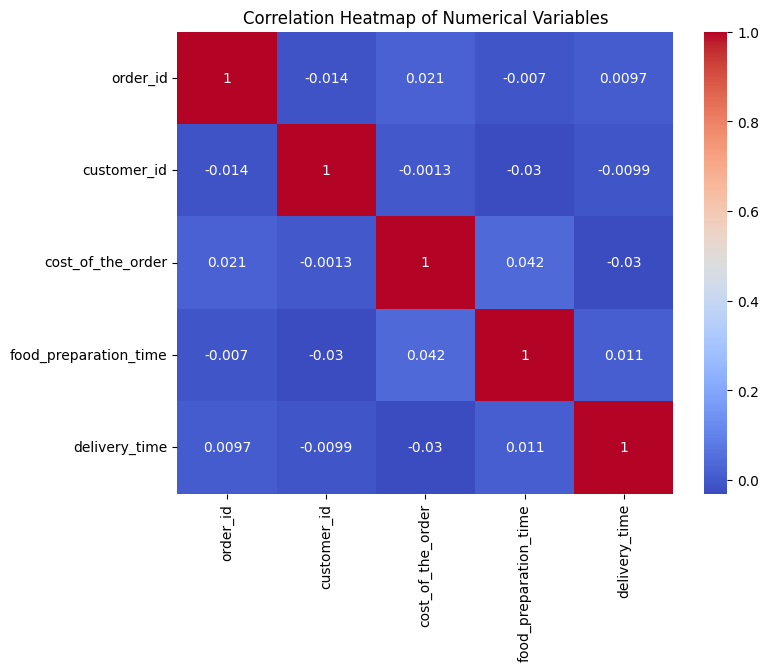

In [ ]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### **The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer**

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#to filter the restaurant that meet the criteria
restaurant_group = df.groupby('restaurant_name').agg({
    'rating': ['count', 'mean']
}).reset_index()

restaurant_group.columns = ['restaurant_name', 'rating_count', 'average_rating']

# to filter the code based on conditions
qualified_restaurants = restaurant_group[
    (restaurant_group['rating_count'] > 50) &
    (restaurant_group['average_rating'] > 4)
]

print("Restaurants fulfilling the criteria for the promotional offer:")
print(qualified_restaurants)

Restaurants fulfilling the criteria for the promotional offer:
               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


#### Observations: I can observe that the restaurants fufilling the criteria for the promotional offer are ;
-  Blue Ribbon Fried Chicken with a rating count 64 and average rating 4.328125
-  Blue Ribbon Sushi with a rating 73  and average rating 4.219178
- Shake shack with a rating 133 and average rating of 4.278195
- The meatball shop with rating count 84 and average rating of 4.511905



### **The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders**

In [ ]:
# Apply 25% charge for orders costing more than 20 dollars
revenue_above_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Apply 15% charge for orders costing between 5 and 20 dollars
revenue_between_5_and_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate the total net revenue
total_revenue = revenue_above_20 + revenue_between_5_and_20

print(f"The total net revenue generated by the company is: ${total_revenue:.2f}")

The total net revenue generated by the company is: $6166.30


#### Observations: I can observe that the net revenue generated by the company across all orders is $6166.30



### **The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)**

In [ ]:
# this is to calculate the total time fro preparation and delivery
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

orders_above_60 = df[df['total_time'] > 60].shape[0]

total_orders = df.shape[0]

percentage_above_60 = (orders_above_60 / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes: {percentage_above_60:.2f}%")

The percentage of orders that take more than 60 minutes: 10.54%


#### Observations: I can observe that the percentage of orders that takes more than 60 minutes to get delivered from the time the order is placed is 10.54%



### **The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?**

In [ ]:
# to analyse the delivery time of orders on weekdays and weekends
weekdays = df[df['day_of_the_week']=='Weekday']
weekends = df[df['day_of_the_week']=='Weekend']

weekday_mean_delivery_time = weekdays['delivery_time'].mean()
weekend_mean_delivery_time = weekends['delivery_time'].mean()

print(f"The mean delivery time on the weekday is : {weekday_mean_delivery_time: .2f}")
print(f"The mean delivery time on the weekend is : {weekend_mean_delivery_time: .2f}")

The mean delivery time on the weekday is :  28.34
The mean delivery time on the weekend is :  22.47


#### Observations: I can observe that the mean delivery time during the weekday is 28.34 and the mean delivery time during the weekend is 22.47


### Conclusion and Recommendations

### **What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)**

### Conclusions:
- I can conclude that the mean delivery time during the weekdays is 28.34 while it is lower during the weekends, at 22.47 minutes. This suggest that deliveries tend to be quicker on the weekends and slower on the weekdays, probably as a result of traffic
- I can conclude that approximately 10.54% of orders take more than 60 minutes to be delivered.This might be causing dissatisfaction among customer, especially when the overall delivery time is much shorter.


### Recommendations:

*  I can recommend using feedbacks for continuous improvement.It can be done by encouraging customers to provide feedback by offering discounts for their next orders which can help improve the service.
* I can also recommend a suggestion by by improving weekday delivery times because it takes longer to deliver on weekdays.The company should look into ways of making delivery faster, a suggestion can be by having more staff available for delivery or using better delivery routes.



---